# Reply to "Entanglement lost" Question in QML Course

[Check the question here](https://courses.edx.org/courses/course-v1:University_of_TorontoX+UTQML101x+2T2019/courseware/5833ff13fd1f4507a4016b4a60fa75bb/8022840dfd7a438981ea6aa15501a0e5/?child=first)

First let's import the necessary code from the Jupyter Notebook, in this we define the density mixed matrix obtained from a pure state density matrix added with a maximally_mixed_state 

In [20]:
import math
import numpy as np
import matplotlib.pyplot as plt

def mixed_state(pure_state, visibility):
    density_matrix = pure_state * pure_state.T.conj()
    maximally_mixed_state = np.eye(4)/2**2
    return visibility*density_matrix + (1-visibility)*maximally_mixed_state

Then, let's define the Von Neumann Entropy. [I borrowed this code forme Computer Science Stack Exchange](https://cs.stackexchange.com/questions/56261/computing-von-neumann-entropy-efficiently), it works very well (avoids the infinity problem that the log_2 implies)

In [43]:
def von_neumann_entropy(density_matrix, cutoff=10):
    
    # assign as numpy matrix the input
    x = np.mat(density_matrix)
    # define a identity matrix with the same dimension 
    one = np.identity(x.shape[0])
    # performs the polynomial expansion
    base = one - x
    power = base*base
    result = np.trace(base)
    for k in range(2, cutoff):
        result -= np.trace(power) / (k*k - k)
        power = power.dot(base)

    # Twiddly hacky magic.
    a = cutoff
    for k in range(3):
        d = (a+1) / (4*a*(a-1))
        result -= np.trace(power) * d
        power = power.dot(power)
        result -= np.trace(power) * d
        a *= 2
    result -= np.trace(power) / (a-1) * 0.75

    return result / math.log(2)  # convert from nats to bits

Another way to test the purity of a quantum state in Von Neumann representation (density operator representation) is the [**purity test**](https://en.wikipedia.org/wiki/Purity_(quantum_mechanics)):

In [ ]:
def purity_test (density_matrix):
    return np.trace(np.matmul(density_matrix,density_matrix))

Then, let's define the state as a Bell's state:

In [44]:
# State definition
zero_ket = [[0],[1]]
one_ket = [[1],[0]]

state_00 = np.kron(zero_ket,zero_ket)
state_11 = np.kron(one_ket,one_ket)

ϕ = (state_00 + state_11)
ϕ = ϕ / np.linalg.norm(ϕ)

Now, we define a data structure which contains the Von Neumann entropy values and purity test of the the mixed state in function of the visibility parameter.

In [50]:
visibilities = np.linspace(0, 1, 100)

entropy = []
ptest = []
for v in visibilities:
    m_state = mixed_state(ϕ, v)
    entropy.append(von_neumann_entropy(m_state))
    ptest.append(purity_test(m_state))


Finally, we plot this function

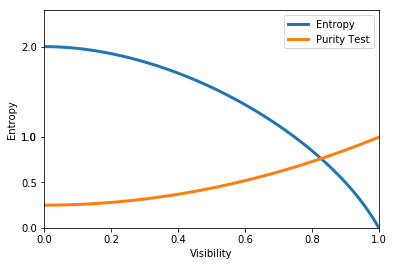

In [49]:
fig, ax = plt.subplots()
ax.plot(visibilities, entropy, linewidth=3, label = "Entropy")
ax.plot(visibilities, ptest, linewidth=3, label = "Purity Test")
ax.set_xlim(0, 1)
ax.set_ylim(0, 1.2*max(entropy))
ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax.set_yticks([2,1,0.5,0,1])
ax.set_xlabel('Visibility')
ax.set_ylabel('Entropy')
ax.legend()

In the plot, we can see that the entropy is maximum when the visibility is 0. That parameter has the theoretical minimum purity value: 1 / D where D = 4 is the dimension of the Hilbert space. (cfr. wikipedia article). 